# 问题一（拟牛顿法-BFGS）

In [25]:
using DelimitedFiles
using Plots
using LinearAlgebra

In [26]:
# 读取数据
data = readdlm("ex2data2.txt", ',', Float64, '\n') 
A = data[:, 1:2] # 前两维为特征
y = data[:, 3]; # 第三维为标签类别

In [27]:
function plotData(X, y) 
    scatter(X[y .== 0, 1], X[y .== 0, 2], marker=:+, markersize=7) 
    scatter!(X[y .== 1, 1], X[y .== 1, 2], marker=:o, markersize=7)  
end
function mapFeature(X1, X2; degree = 6) 
    out = [ones(length(X1))]
    for i = 1:degree 
        for j = 0:i 
            push!(out, X1 .^ (i - j) .* X2 .^ j) 
        end
    end
    return reduce(hcat, out) 
end
function Linear(u, v; θ = θ, degree = 6) 
    out = [1.0] 
    for i = 1:degree 
        for j = 0:i 
            push!(out, u^(i - j) * v^j) 
        end
    end
    return out' * θ 
end
sigmoid(z) = 1 / (1 + exp(-z)) 
function f(θ; X = X, y = y) 
    z = X * θ 
    h = @. sigmoid(z) 
    J = -(y' * log.(h) + (1.0 .- y)' * log.(1.0 .- h)) / length(y) 
    return J  
end
function gradient(θ; X = X, y = y) 
    z = X * θ 
    h = @. sigmoid(z) 
    return X' * (h - y) / length(y) 
end



gradient (generic function with 1 method)

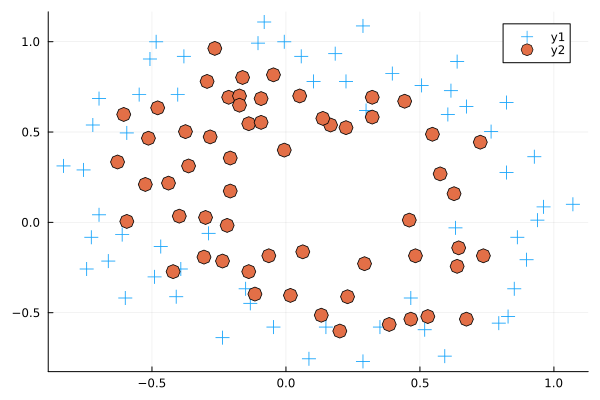

In [28]:
plotData(A, y)

In [29]:
X = mapFeature(A[:, 1], A[:, 2]) 
size(X)

(118, 28)

In [30]:
function bfgs(θ; X = X, y = y, max_iter = 1000, tol = 1e-10)
    n = length(θ)
    B = I # 初始的近似Hessian矩阵

    for iter in 1:max_iter
        g = gradient(θ, X=X, y=y)
        
        if norm(g) < tol
            println("Converged after $iter iterations")
            break
        end

        p = -B * g # 计算搜索方向

        θ_new = θ + p
        g_new = gradient(θ_new, X=X, y=y)

        yk = g_new - g
        sk = θ_new - θ
        ρk = 1.0 / (yk' * sk)
        B = (I - ρk * sk * yk') * B * (I - ρk * yk * sk') + ρk * sk * sk'
        θ = θ_new
    end
    return θ
end


bfgs (generic function with 1 method)

Converged after 470 iterations
  0.080311 seconds (82.02 k allocations: 34.465 MiB, 11.79% gc time, 74.68% compilation time)


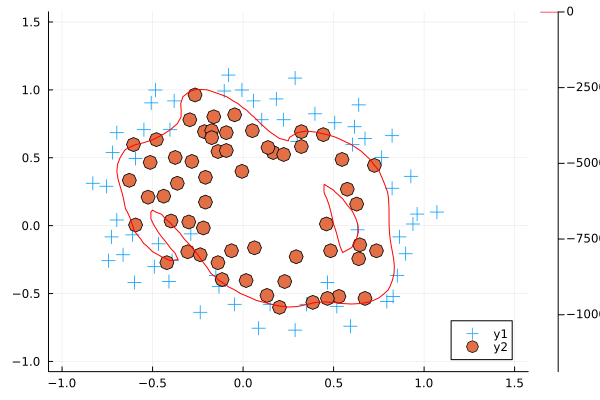

In [31]:
m, n = size(X) 
θ = randn(n) 
@time θ = bfgs(θ) 
u = range(-1, 1.5, 50+1) 
v = range(-1, 1.5, 50+1)  
plotData(A, y) 
contour!(u, v, Linear, levels=[0], color=:red) 

# 问题二 

## 5.3
$$\nabla\phi(x)=Ax-b\overset{\mathrm{def}}{=}r(x),$$
## 5.4
$$r_k = Ax_k - b.$$

# 问题三

## 3.1 验算 $\int_{-\pi}^{\pi}\sin{kx}\sin{jx} \mathrm{d}x=0 ,\qquad$ $k \neq j$

### 法一（积化和差）

由积化和差公式
$
\begin{aligned}
\sin A\sin B&=\frac12[\cos(A-B)-\cos(A+B)]
\end{aligned}
$
得
$$
\begin{aligned}
\int_{-\pi}^{\pi}\sin kx\sin jx\mathrm{d}x
& =\frac12\int_{-\pi}^{\pi}\cos(kx-jx)\mathrm{d}x-\frac12\int_{-\pi}^{\pi}\cos(kx+jx)\mathrm{d}x  \\
&=\frac12\left[\frac{\sin(k-j)x}{k-j}\right]_{-\pi}^\pi-\frac12\left[\frac{\sin(k+j)x}{k+j}\right]_{-\pi}^\pi  \\
&=\frac12\left[\frac{\sin(k-j)\pi}{k-j}-\frac{\sin-(k-j)\pi}{k-j}\right]-\frac12\left[\frac{\sin(k+j)\pi}{k+j}-\frac{\sin(-(k+j)\pi)}{k+j}\right]. \\
&=\left[\frac{\sin(k-j)\pi}{k-j}\right]-\left[\frac{\sin(k+j)\pi}{k+j}\right]. \\
&=0
\end{aligned}
$$

### 法二（分部积分） $k,j \in \mathbb{R},k \neq j$

$$
\begin{aligned}
&\int_{-\pi}^{\pi}\sin kx\sin jx \mathrm{d}x \\
&=-\frac{1}{j}\int_{-\pi}^{\pi}sinkx \mathrm{d}(\cos jx) \\
&=-\frac{1}{j}\left[\sin kx\cos jx\bigg|_{-\pi}^{\pi}-\int_{-\pi}^{\pi}\cos jx \mathrm{d}(\sin kx)\right] \\
&=\frac{k}{j}\int_{-\pi}^{\pi}\cos jx\cos kx \mathrm{d}x \\
&=\frac{k}{j^2}\int_{-\pi}^{\pi}\cos kx\mathrm{d}(\sin jx) \\
&=\frac{k}{j^{2}}\left[\sin jx\cos kx \bigg|_{-\pi}^{\pi}-\int_{-\pi}^{\pi}\sin jx \mathrm{d}(\cos kx)\right] \\
&=\frac{k^2}{j^2}\int_{-\pi}^{\pi}\sin jx\sin kx \mathrm{d}x \\
&\text{即}(1-\frac{k^{2}}{j^{2}})\int_{-\pi}^{\pi}\sin kx \sin jx \mathrm{d}x=0 \\
&\because k \neq j \\
&\therefore 1-\frac{k^{2}}{j^{2}} \neq 0 \\
&\therefore \int_{-\pi}^{\pi}\sin kx \sin jx \mathrm{d}x=0
\end{aligned}
$$

### 法三（欧拉公式）$k,j \in \mathbb{R},k \neq j$

因为$k,j$为实数，由欧拉公式 $e^{ix}=\cos x+i\sin x$ 得
$$
\sin(x)=\frac{e^{ix}-e^{-ix}}{2i}
$$
故
$$
\begin{aligned}
\int_{-\pi}^{\pi}\sin(kx)\sin(jx)\mathrm{d}x& =\int_{-\pi}^{\pi}\frac{e^{ikx}-e^{-ikx}}{2i}\cdot\frac{e^{ijx}-e^{-ijx}}{2i}\mathrm{d}x  \\
&=\frac1{4i^2}\int_{-\pi}^{\pi}(e^{ikx}-e^{-ikx})(e^{ijx}-e^{-ijx})\mathrm{d}x \\
&=-\frac14\int_{-\pi}^{\pi}(e^{i(k+j)x}-e^{i(k-j)x}-e^{-i(k-j)x}+e^{-i(k+j)x})\mathrm{~}\mathrm{d}x \\
&=-\frac14\left[\frac{e^{i(k+j)x}}{i(k+j)}-\frac{e^{i(k-j)x}}{i(k-j)}-\frac{e^{-i(k-j)x}}{-i(k-j)}+\frac{e^{-i(k+j)x}}{-i(k+j)}\right]_{-\pi}^{\pi} \\
&=-\frac14\left[\frac{2(e^{i(k+j)\pi}-e^{-i(k+j)\pi})}{i(k+j)}-\frac{2(e^{i(k-j)\pi}-e^{-i(k-j)\pi})}{i(k-j)}\right] \\
&=-\frac14\left[\frac{4(e^{i(k+j)\pi}-e^{-i(k+j)\pi})}{2i(k+j)}-\frac{4(e^{i(k-j)\pi}-e^{-i(k-j)\pi})}{2i(k-j)}\right] \\
&=\left[\frac{e^{i(k-j)\pi}-e^{-i(k-j)\pi}}{2i(k-j)} - \frac{e^{i(k+j)\pi}-e^{-i(k+j)\pi}}{2i(k+j)}\right] \\
&=\left[\frac{\sin((k-j)\pi)}{k-j}\right]-\left[\frac{\sin((k+j)\pi)}{k+j}\right]\\
&=0
\end{aligned}
$$

## 3.2 编程验证

In [29]:
x = range(-π,π,101)
n = 100

100

In [30]:
y1 = sin.(x)
y2 = @.sin(2x)
dx = (1 + 1) / n * π 
(y1' * y2) * dx 

-8.881225145946523e-17

In [32]:
y1 = sin.(233x)
y2 = @.sin(466x)
dx = (1 + 1) / n * π 
(y1' * y2) * dx 

4.2531993119723233e-14

In [33]:
y1 = sin.(521x)
y2 = @.sin(1314x)
dx = (1 + 1) / n * π 
(y1' * y2) * dx 

3.3042686213482156e-14

In [34]:
a = @.sin(x) + 2sin(2x) + 3sin(3x);
t = @.sin(3x)
coe = t' * a * dx / π

3.0000000000000013

In [37]:
a = @.sin(123x) + 2sin(234x) + 3sin(345x);
t = @.sin(345x)
coe = t' * a * dx / π

2.9999999999999787

In [44]:
a = @.sin(0.0001x) + 2sin(0.002x) + 3sin(3x);
t = @.sin(3x)
coe = t' * a * dx / π

3.0027252191513463

## 3.2 $sin(kx)$  可视化

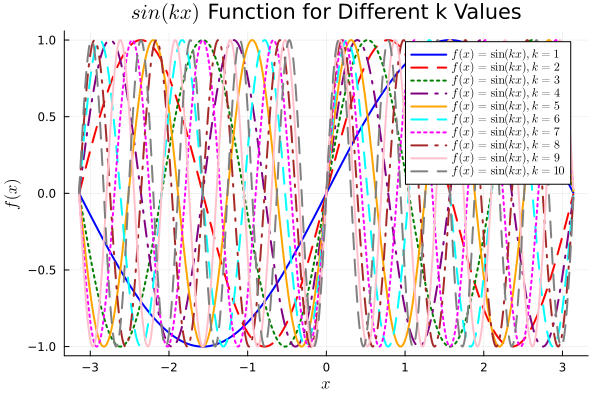

In [1]:
using Plots

# 定义函数
f(x, k) = sin(k * x)
# 生成 x 值的范围
x_values2 = -π:0.01:π 
# 设置不同的 k 值
k_values2 = 1:10 
# 自定义线条的颜色、宽度和样式
line_colors = [:blue, :red, :green, :purple, :orange, :cyan, :magenta, :brown, :pink, :gray]
line_widths = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
line_styles = [:solid, :dash, :dot, :dashdot, :solid, :dash, :dot, :dashdot, :solid, :dash]
# 绘制不同 k 值对应的函数图像
for (i, k) in enumerate(k_values2)
    y_values2 = sin.(k * x_values2)
    plot!(x_values2, y_values2, label="\$f(x) = \\sin(kx), k = $k\$", linecolor=line_colors[i], linewidth=line_widths[i], linestyle=line_styles[i],legend=:topright)
end
# 设置图形参数
xlabel!("\$x\$")
ylabel!("\$f(x)\$")
title!("\$sin(kx)\$ Function for Different k Values")

# 问题四 （课本 公式3-27）

## 4.1 A 为 单位矩阵

In [45]:
using LinearAlgebra
A = I(5)
a1 = randn(5); a2 = randn(5); a3 = randn(5); a4 = randn(5); a5 = randn(5)
a1 = a1;
a2 = a2 - (a2' * A * a1) / (a1' * A * a1) * a1;
a3 = a3 - (a3' * A * a1) / (a1' * A * a1) * a1 - (a3' * A * a2) / (a2' * A * a2) * a2
a4 = a4 - (a4' * A * a1) / (a1' * A * a1) * a1 - (a4' * A * a2) / (a2' * A * a2) * a2 - (a4' * A * a3) / (a3' * A * a3) * a3
a5 = a5 - (a5' * A * a1) / (a1' * A * a1) * a1 - (a5' * A * a2) / (a2' * A * a2) * a2 - (a5' * A * a3) / (a3' * A * a3) * a3 - (a5' * A * a4) / (a4' * A * a4) * a4

5-element Vector{Float64}:
  0.6917299883566544
 -0.11493824508800443
  0.39905415470393263
  0.9462235883311768
 -0.6445050101176485

## 4.2 

In [46]:
using LinearAlgebra
A2 = [2 -1  0  0  0;
    -1  2 -1  0  0;
     0 -1  2 -1  0;
     0  0 -1  2 -1;
     0  0  0 -1  2];
a1 = randn(5); a2 = randn(5); a3 = randn(5); a4 = randn(5); a5 = randn(5)
a1 = a1;
a2 = a2 - (a2' * A2 * a1) / (a1' * A2 * a1) * a1;
a3 = a3 - (a3' * A2 * a1) / (a1' * A2 * a1) * a1 - (a3' * A2 * a2) / (a2' * A2 * a2) * a2
a4 = a4 - (a4' * A2 * a1) / (a1' * A2 * a1) * a1 - (a4' * A2 * a2) / (a2' * A2 * a2) * a2 - (a4' * A2 * a3) / (a3' * A2 * a3) * a3
a5 = a5 - (a5' * A2 * a1) / (a1' * A2 * a1) * a1 - (a5' * A2 * a2) / (a2' * A2 * a2) * a2 - (a5' * A2 * a3) / (a3' * A2 * a3) * a3 - (a5' * A2 * a4) / (a4' * A2 * a4) * a4

5-element Vector{Float64}:
 -0.47374689374124834
 -0.40331442742754003
 -0.6473610185652164
 -0.6551074843940488
 -0.4327084018188607

# 问题五

## 5.1 共轭梯度算法公式

**Algorithm 5.1**(CG-Preliminary Version).$\\$
$
\;\;\mathrm{Given}x_{0}; \\
\;\;\operatorname{Set}r_0\leftarrow Ax_0-b,p_0\leftarrow-r_0,k\leftarrow0; \\
\;\;\mathbf{while} \;r_{k}\neq0 \\
$
$$
\begin{aligned}
 \\
\alpha_{k}& \leftarrow-\frac{r_k^Tp_k}{p_k^TAp_k}; && (5.14\mathtt{a})  \\
x_{k+1}&\leftarrow x_{k}+\alpha_{k}p_{k}; && (5.14\mathrm{b})  \\
r_{k+1}& \leftarrow Ax_{k+1}-b; && (5.14\text{с})  \\
\beta_{k+1}& \leftarrow\frac{r_{k+1}^TAp_k}{p_k^TAp_k}; && (5.14\mathrm{d})  \\
p_{k+1}& \leftarrow-r_{k+1}+\beta_{k+1}p_k; && (5.14\mathsf{e})  \\
k&\leftarrow k+1;&& \text{(5.14f)}  \\
\end{aligned}
$$

$
\;\;\mathbf{end} (\mathbf{while})
$

## 5.2 验算 $A * x \overset{?} = b$

In [12]:
function conjugate_gradient(A, b, x0; max_iter = 1000, tol = 1e-10)
    n = length(b)
    x = copy(x0)
    r = b - A * x
    p = copy(r)
    rsold = r' * r
    for k in 1:max_iter
        Ap = A * p
        alpha = rsold / (p' * Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = r' * r
        if sqrt(rsnew) < tol
            println("$k 次迭代后收敛")
            return x
        end
        beta = rsnew / rsold
        p = r + beta * p
        rsold = rsnew
    end
    println("$max_iter 次迭代后没有收敛")
    return x
end

conjugate_gradient (generic function with 1 method)

In [13]:
n = 5
b = ones(n)
x0 = zeros(n)
A = [2 -1  0  0  0;
    -1  2 -1  0  0;
     0 -1  2 -1  0;
     0  0 -1  2 -1;
     0  0  0 -1  2];

In [28]:
x = conjugate_gradient(A, b, x0)
# 验证 A * x 是否等于 b
if isapprox(A * x, b, atol=1e-10)
    println("A * x  等于 b")
else
    println("A * x 不等于 b")
end

3 次迭代后收敛
A * x  等于 b
